In [1]:
# ============================================================
# 01. Seleccionar comuna de estudio
# ============================================================
COMUNA = "Cerrillos"   # puedes cambiar aquí el nombre si necesitas otra comuna
print(f"Comuna seleccionada: {COMUNA}")

# ============================================================
# 2. Configuración del ambiente de desarrollo
# ============================================================

# Librerías principales
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
import os

# Configuración de visualización
plt.style.use("seaborn-v0_8-darkgrid")


Comuna seleccionada: Cerrillos


In [2]:
# ============================================================
# 3. Descargar datos desde múltiples fuentes
# ============================================================

# Usamos el script de descarga que baja OSM (buildings, red vial, etc.)
!python ../scripts/download_data.py --comuna "Cerrillos" --sources all

# Revisar que se hayan descargado los archivos en la carpeta raw
print("Archivos en data/raw:")
print(os.listdir("../data/raw"))


2025-10-04 16:27:49,013 - INFO - ==================================================
2025-10-04 16:27:49,013 - INFO - INICIANDO DESCARGA DE DATOS
2025-10-04 16:27:49,013 - INFO - ==================================================
2025-10-04 16:27:49,013 - INFO - Inicializando descarga para comuna: Cerrillos
2025-10-04 16:27:49,013 - INFO - Descargando red vial desde OSM...
2025-10-04 16:27:49 Retrieved response from cache file 'cache/df5f96c9d8bb30e271c0f6e56af51dcd3835083f.json'
2025-10-04 16:27:49 Created GeoDataFrame with 1 rows from 1 queries
2025-10-04 16:27:49 Constructed place geometry polygon(s) to query API
2025-10-04 16:27:49 Projected GeoDataFrame to 'EPSG:32719 / WGS 84 / UTM zone 19S'
2025-10-04 16:27:49 Projected GeoDataFrame to 'EPSG:4326 / WGS 84'
2025-10-04 16:27:49 Projected GeoDataFrame to 'EPSG:32719 / WGS 84 / UTM zone 19S'
2025-10-04 16:27:49 Projected GeoDataFrame to 'EPSG:4326 / WGS 84'
2025-10-04 16:27:49 Requesting data from API in 1 request(s)
2025-10-04 16:27

/tmp/ipykernel_158/288593733.py:9: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  cerrillos.to_file("../data/raw/cerrillos_limite.shp")


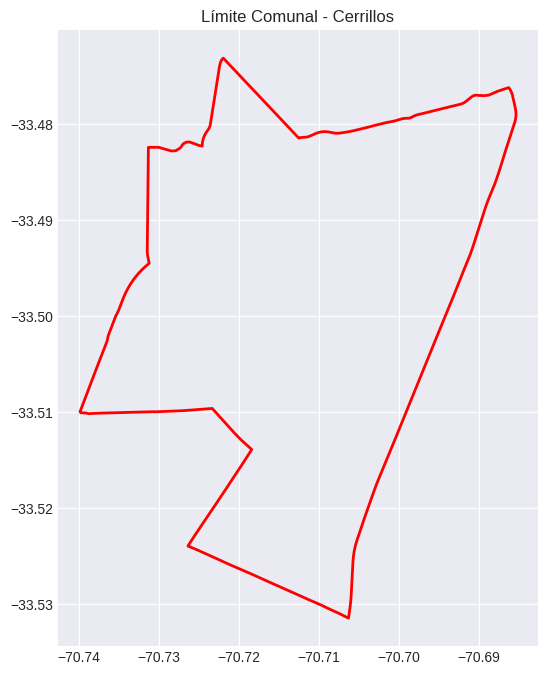

In [3]:
# ============================================================
# 4. Descargar y guardar el límite comunal desde OSMnx
# ============================================================

# Descargar polígono de Cerrillos desde OSMnx
cerrillos = ox.geocode_to_gdf(f"{COMUNA}, Chile")

# Guardar shapefile del límite
cerrillos.to_file("../data/raw/cerrillos_limite.shp")

# Graficar límite
fig, ax = plt.subplots(figsize=(8, 8))
cerrillos.boundary.plot(ax=ax, color="red", linewidth=2)
plt.title(f"Límite Comunal - {COMUNA}")
plt.show()


In [4]:
# ============================================================
# 5. Cargar datos descargados (OSM) - Cerrillos
# ============================================================

# Edificios
buildings = gpd.read_file("../data/raw/osm_buildings_cerrillos.geojson")

# Red vial
G = ox.load_graphml("../data/raw/osm_network_cerrillos.graphml")
edges = ox.graph_to_gdfs(G, nodes=False)

# Convertir todo al mismo sistema de coordenadas (UTM, EPSG:32719 para Chile central)
cerrillos = cerrillos.to_crs(epsg=32719)
buildings = buildings.to_crs(epsg=32719)
edges = edges.to_crs(epsg=32719)

print(" Datos cargados y reproyectados a EPSG:32719 (Cerrillos)")


 Datos cargados y reproyectados a EPSG:32719 (Cerrillos)


/tmp/ipykernel_158/3984306054.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


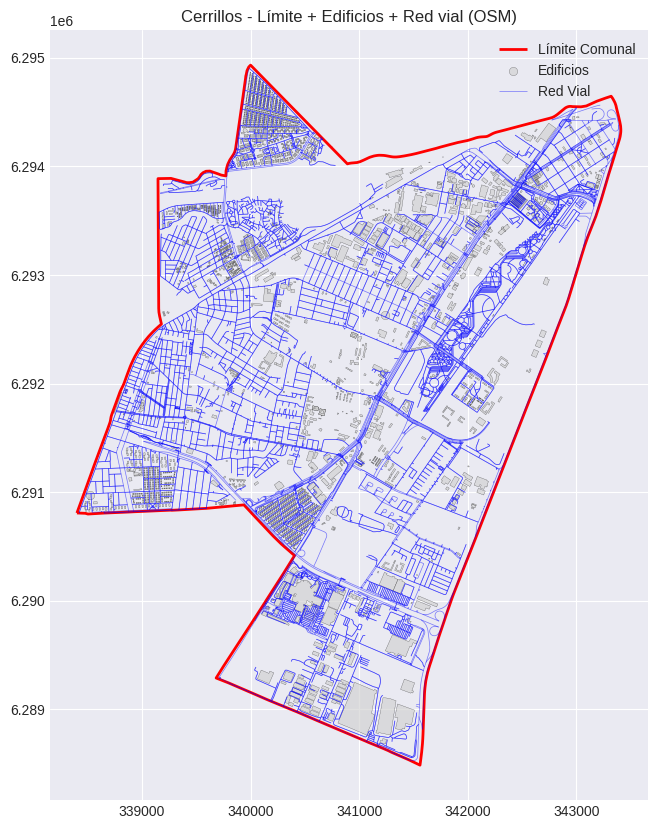

In [5]:
# ============================================================
# 6. Visualización integrada
# ============================================================

fig, ax = plt.subplots(figsize=(10, 10))

cerrillos.boundary.plot(ax=ax, color="red", linewidth=2, label="Límite Comunal")
buildings.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=0.2, alpha=0.7, label="Edificios")
edges.plot(ax=ax, color="blue", linewidth=0.5, alpha=0.5, label="Red Vial")

plt.legend()
plt.title(f"{COMUNA} - Límite + Edificios + Red vial (OSM)")
plt.show()


In [7]:
# Guardar los datos base limpios
cerrillos.to_file("../data/raw/cerrillos_limite.shp")
buildings.to_file("../data/raw/osm_buildings_cerrillos.geojson", driver="GeoJSON")

# Limpiar y guardar red vial
def clean_edges_for_export(edges):
    edges_clean = edges.copy()
    for col in edges_clean.columns:
        edges_clean[col] = edges_clean[col].apply(
            lambda x: str(x) if isinstance(x, (list, dict)) else x
        )
    return edges_clean

edges_clean = clean_edges_for_export(edges)
edges_clean.to_file("../data/raw/osm_edges_cerrillos.geojson", driver="GeoJSON")

print("✅ Todos los datos base guardados en data/raw/")


/tmp/ipykernel_158/2711537952.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  cerrillos.to_file("../data/raw/cerrillos_limite.shp")


✅ Todos los datos base guardados en data/raw/
